In [1]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

'''
    Train a simple convnet on the MNIST dataset.

    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py

    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
'''

batch_size = 128
nb_classes = 10
nb_epoch = 8

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(32, 1, 3, 3, border_mode='full')) 
model.add(Activation('relu'))
model.add(Convolution2D(32, 32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32*196, 128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128, nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')




X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [2]:
# This is likely to take upwards of three hours. !
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 0
60000/60000 [==============================] - 1557s - loss: 0.3283 - acc.: 0.8968 - val. loss: 0.0662 - val. acc.: 0.9783
Epoch 1
60000/60000 [==============================] - 1651s - loss: 0.1002 - acc.: 0.9702 - val. loss: 0.0449 - val. acc.: 0.9849
Epoch 2
60000/60000 [==============================] - 1565s - loss: 0.0730 - acc.: 0.9781 - val. loss: 0.0383 - val. acc.: 0.9874
Epoch 3
60000/60000 [==============================] - 1597s - loss: 0.0577 - acc.: 0.9825 - val. loss: 0.0304 - val. acc.: 0.9901
Epoch 4
60000/60000 [==============================] - 1708s - loss: 0.0517 - acc.: 0.9838 - val. loss: 0.0315 - val. acc.: 0.9904
Epoch 5
60000/60000 [==============================] - 1977s - loss: 0.0467 - acc.: 0.9856 - val. loss: 0.0281 - val. acc.: 0.9911
Epoch 6
60000/60000 [==============================] - 5044s - loss: 0.0416 - acc.: 0.9878 - val. loss: 0.0290 - val. acc.: 0.9900
Epoch 7
60000/60000 [============

In [3]:
model.layers

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
def show_layer(layer):
    weights = layer.W.eval()
    print(weights.shape)
    print(weights[0].shape)
    plt.imshow(weights[30])

(32, 32, 3, 3)
(32, 3, 3)


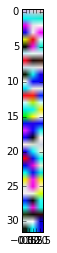

In [31]:
show_layer(model.layers[2])